# Data Visualization

# Import Python Packages

The first thing we want to do is import the basic Python packages such as NumP, Matplotlib and Pandas.

In [14]:
# NumPy adds support for large, multi-dimensional arrays and matrices, along with a large collection 
# of high-level mathematical functions to operate on these arrays.
import numpy as np

# Matplotlib is a plotting library for the Python programming language and its numerical mathematics 
# extension NumPy. It provides an object-oriented API for embedding plots into applications using 
# general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK+.
import matplotlib.pyplot as plt

# Pandas is a software library for data manipulation and analysis. In particular, it offers data 
# structures and operations for manipulating numerical tables and time series.
import pandas as pd

# Import Our Data

*Pandas* is the primary tool data scientists use for exploring and manipulating data. Most people abbreviate Pandas in their code as *pd*. Here, we import the data into a Pandas *DataFrame* which is the most important part of the Pandas library and will be used to process our data going forward. A *DataFrame* holds the type of data you might think of as a table. This is similar to a sheet in Excel, or a table in a SQL database.

Here are the different parts of a data set:

- **Labels** - Future outcomes. This is the value we are trying to predict. Labels are used in supervised learning.
- **Features (Dimensions)** - All other attributes used to predict Labels. Any attribute chosen to be used as a data point in the training data set. eg. Age, occupation, sex, zip code, etc.
- **Feature Vector** - The distinct values of a single feature.
- **Example** - A single Feature value or point on the graph or Feature Vector.

![](https://github.com/harperd/machine-learning/blob/master/images/dataparts.gif?raw=1)

Let's configure the data file that will used in this interactive tutorial. For now, this tutorial expects a CSV file but can easily be up dated to accomodate other data sources and file formats.

In [2]:
data_file    = 'https://raw.githubusercontent.com/harperd/machine-learning/master/data/cardiacData.csv'
features     = [ 'HeartRate', 'Att', 'STE', 'Age', 'Outcome' ]
data_header  = None

First, let's read the file and create our DataFrame.

In [3]:
df_raw = pd.read_csv(data_file, header = data_header, names = features, low_memory = False)
%time print(f"{len(df_raw.index)} rows read.")

250 rows read.
Wall time: 0 ns


Now, we can take a quick look at some of the data in our DataFrame to see what it looks like and make sure it loaded okay.

In [4]:
df_raw.head()

,HeartRate,Att,STE,Age,Outcome
0,84,0,55,0,0
1,76,0,80,0,0
2,50,0,80,0,0
3,60,0,44,0,0
4,106,0,77,1,0


# Understanding Our Data

In any sort of data science work, it's important to look at your data, to make sure you understand the format, how it's stored, what type of values it holds, etc. Even if you've read descriptions about your data, the actual data may not be what you expect.

## File Metadata

Looking at the data types int the file will help us understand the file format. If we notice a column or *Feature*, that we want to include in our data set that is non-numeric we will want to convert that to a numeric data type when we begin *Feature Engineering* (pre-processing our data).

In [5]:
df_raw.dtypes

HeartRate    int64
Att          int64
STE          int64
Age          int64
Outcome      int64
dtype: object

## Describing Our Data

The first number, the count, shows how many rows have non-missing values.

Missing values arise for many reasons. For example, the size of the 2nd bedroom wouldn't be collected when surveying a 1 bedroom house. We'll come back to the topic of missing data.

The second value is the mean, which is the average. Under that, std is the standard deviation, which measures how numerically spread out the values are.

To interpret the min, 25%, 50%, 75% and max values, imagine sorting each column from lowest to highest value. The first (smallest) value is the min. If you go a quarter way through the list, you'll find a number that is bigger than 25% of the values and smaller than 75% of the values. That is the 25% value (pronounced "25th percentile"). The 50th and 75th percentiles are defined analogously, and the max is the largest number.

In [8]:
df_raw.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
HeartRate,250.0,70.008,14.472795,26.0,61.00,70.0,78.0,110.0
Att,250.0,0.104,0.305873,0.0,0.00,0.0,0.0,1.0
STE,250.0,65.548,14.091486,23.0,55.25,67.0,76.0,99.0
Age,250.0,0.360,0.513278,0.0,0.00,0.0,1.0,2.0
Outcome,250.0,0.332,0.471876,0.0,0.00,0.0,1.0,1.0


# Visualizing Our Data

Visualizing the data is key to helping understand the makeup of the data and it's attributes (Feature Vectors). This helps to find ways to tune the model as well as outliers or data that may need standardized.

## Histograms

A fast way to get an idea of the shape of the data, which is to say, the distribution (or density) of each *feature* is to look at *histograms*.

Histograms represent the distribution of a continuous variable (*feature* in this case) over a given interval or period of time. Histograms plot the data by dividing it into intervals called *bins*. It is used to inspect the underlying frequency distribution or shape of the data such as Gaussian (eg. Normal distribution), outliers, skewness, etc.

In a histogram, it is the area of the bar that indicates the frequency of occurrences for each bin. This means that the height of the bar does not necessarily indicate how many occurrences of scores there were within each individual bin. It is the product of height multiplied by the width of the bin that indicates the frequency of occurrences within that bin. 

[Types of distributions](https://www.analyticsvidhya.com/blog/2017/09/6-probability-distributions-data-science/)

### Choosing a Bin Number

Setting bins to a higher or lower number will yeild denser or sparser results. The choice of bin width significantly affects the resulting plot. Smaller binwidths can make the plot cluttered, but larger binwidths may obscure nuances in the data. *Matplotlib* will automatically choose a reasonable binwidth for you, but you can specify the binwidth yourself after trying out several values. There is no true right or wrong answer, you just have to try different bin values and see which works best for your particular data.

> **TIP**: If you have a small amount of data, use wider bins to eliminate noise. If you have a lot of data, use narrower bins because the histogram will not be that noisy.

**What are we looking for?** Normal or *Guassian* distributions are preferred to work with since data tends to cluster at a given point. This is necessary when using a clustering algorithm, such as *K-Means*. If we don't see good clusting of feature data, then we may need to get more data or the data may not be able to usable for clustering. The image below depicts a normal distribution of data that tends to cluster towards the value 0.0.

![](https://github.com/harperd/machine-learning/blob/master/images/normal-distribution.png?raw=1)

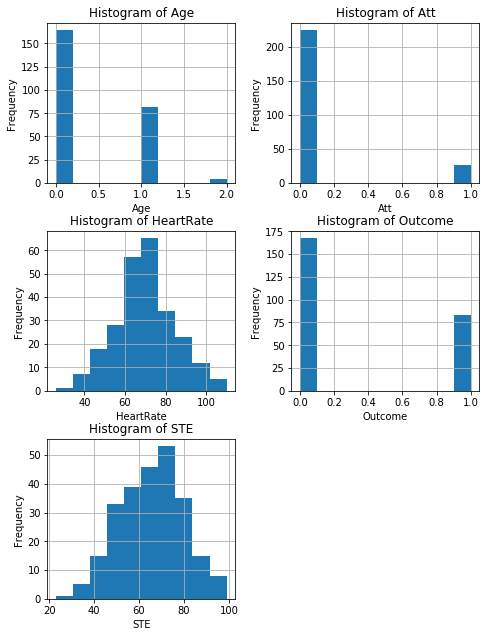

In [9]:
# Using the Data Frame we will produce histograms of each attribute
# with an optional specified number of bins. Matplotlib will automatically
# choose a reasonable binwidth for you if set to None.
axarr = df_raw.hist(histtype = 'bar', bins = 10)

for ax in axarr.flatten():
    feature = ax.get_title()
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    
plt.subplots_adjust(left = 3, right = 4, top = 10, bottom = 8, wspace = None, hspace = None)
plt.show()

## Density Plots

There is also another, often clearer, way to grasp the distribution: density plots or, more formally, *Kernel Density Plots*. They can be considered a smoothed version of the histogram. Their main advantage over the latter is that they do not depend on the size of the bins.

**What are we looking for?** Here again, we want to see if there are any normal distributions of the data.

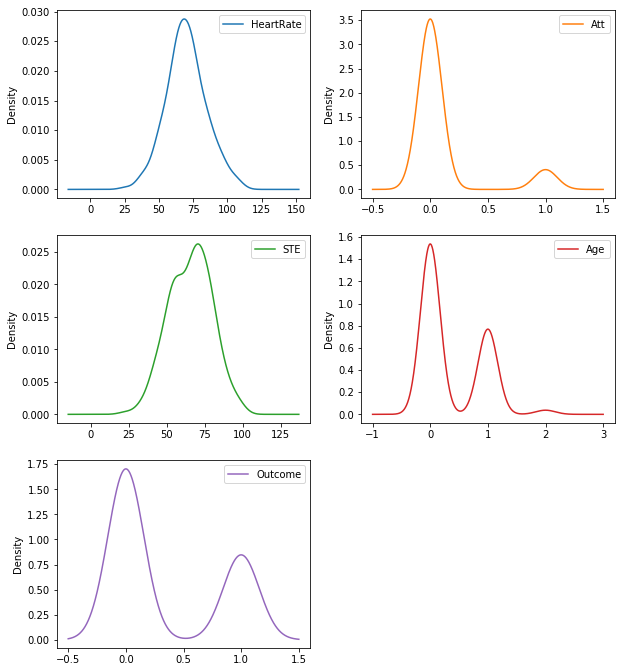

In [11]:
df_raw[features].plot(
    kind = 'density', 
    # A tuple (rows, columns) for the layout of subplots.
    layout = (len(features), 2), 
    # A tuple (width, height) in inches.
    figsize = (10, 20), 
    # Make separate subplots for each column.
    subplots = True, 
    # In case subplots=True, share x axis and set some x axis labels to invisible; 
    # defaults to True if ax is None otherwise False if an ax is passed in; Be aware, 
    # that passing in both an ax and sharex=True will alter all x axis labels for 
    # all axis in a figure!
    sharex = False)
plt.show()

## Box-And-Whisker Plot

A *Box Plot* or *Box and Whisker* plot is good for understanding various aspects of a *Feature* in a single graph. This includes the median, 1st and 3rd quartiles (25% and 75% of the data so what is inside the box is 50% of the data or *Examples*) and the maximum value and the minimum value.
![](https://github.com/harperd/machine-learning/blob/master/images/boxplot.png?raw=1)

Advantages of Box Plots:

- Good for indicating whether a distribution is skewed and whether there are potential unusual observations (outliers) in the data set. 
- When large numbers of observations are involved and when two or more data sets are being compared. 
- Ideal for comparing distributions because the center, spread and overall range are immediately apparent.

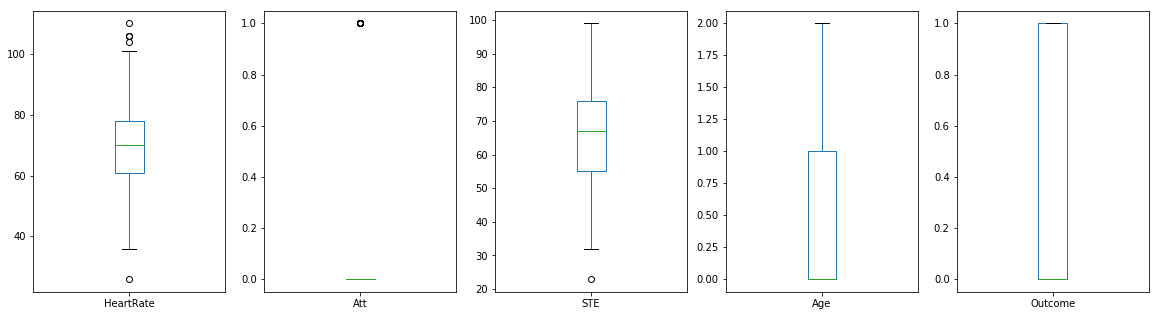

In [12]:
df_raw.plot(
    kind = 'box',
    # A tuple (rows, columns) for the layout of subplots.
    layout = (len(features), 5), 
    # A tuple (width, height) in inches.
    figsize = (20, 30), 
    # Make separate subplots for each column.
    subplots = True, 
    # In case subplots=True, share x axis and set some x axis labels to invisible; 
    # defaults to True if ax is None otherwise False if an ax is passed in; Be aware, 
    # that passing in both an ax and sharex=True will alter all x axis labels for 
    # all axis in a figure!
    sharex = False)
plt.show()

## Scatter Matrix

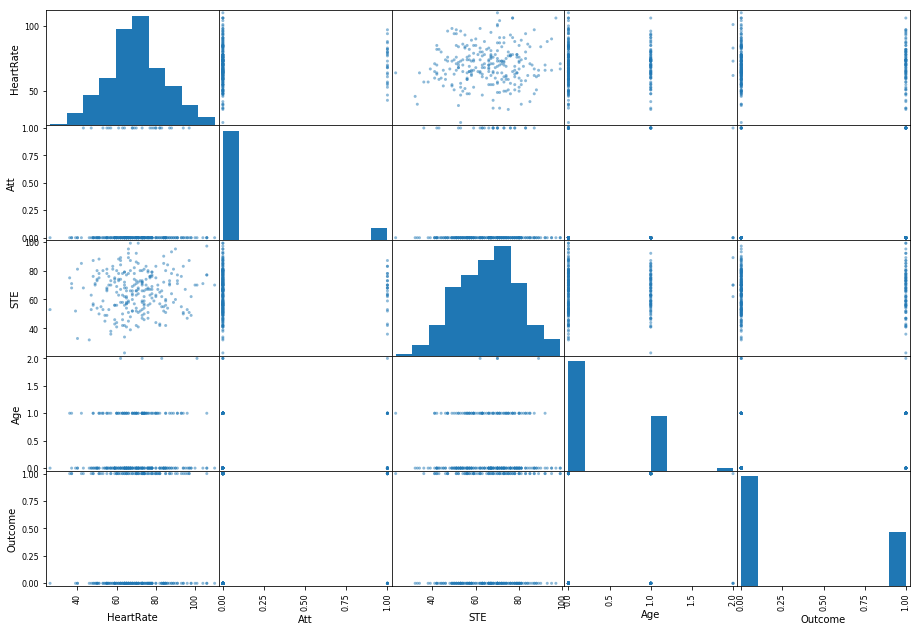

In [13]:
from pandas.plotting import scatter_matrix

scatter_matrix(df_raw)
plt.subplots_adjust(left = 3, right = 5, top = 10, bottom = 8, wspace = None, hspace = None)
plt.show()